## Import libraries

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Get the data

In [42]:
df = pd.read_csv("../../../datasets/parte2/teste/dataset.csv")
dfWeatherData = pd.read_csv("../../../datasets/parte2/teste/missingWeatherData.csv")

## Feature engineering

#### Split date

In [43]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", utc=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(['date'], inplace=True, axis=1)


df.head()

,dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,...,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,year,month,day
0,1.672531e+09,local,12.93,12.76,12.72,13.43,1019.0,NaN,NaN,95.0,...,3.72,100.0,moderate rain,0,0.0,0.467,0.0,2023,1,1
1,1.672535e+09,local,13.49,13.38,13.43,13.90,1018.0,NaN,NaN,95.0,...,3.26,100.0,moderate rain,1,0.0,0.577,0.0,2023,1,1
2,1.672538e+09,local,13.55,13.44,13.48,14.82,1017.0,NaN,NaN,95.0,...,2.44,100.0,moderate rain,2,0.0,0.346,0.0,2023,1,1
3,1.672542e+09,local,13.61,13.51,12.01,14.82,1016.0,NaN,NaN,95.0,...,1.74,100.0,moderate rain,3,0.0,0.270,0.0,2023,1,1
4,1.672546e+09,local,13.59,13.49,12.01,14.82,1015.0,NaN,NaN,95.0,...,1.13,100.0,moderate rain,4,0.0,0.252,0.0,2023,1,1


#### Remove city_name

In [44]:
df.drop('city_name', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,year,month,day
0,1.672531e+09,12.93,12.76,12.72,13.43,1019.0,NaN,NaN,95.0,2.02,3.72,100.0,moderate rain,0,0.0,0.467,0.0,2023,1,1
1,1.672535e+09,13.49,13.38,13.43,13.90,1018.0,NaN,NaN,95.0,2.18,3.26,100.0,moderate rain,1,0.0,0.577,0.0,2023,1,1
2,1.672538e+09,13.55,13.44,13.48,14.82,1017.0,NaN,NaN,95.0,2.88,2.44,100.0,moderate rain,2,0.0,0.346,0.0,2023,1,1
3,1.672542e+09,13.61,13.51,12.01,14.82,1016.0,NaN,NaN,95.0,3.63,1.74,100.0,moderate rain,3,0.0,0.270,0.0,2023,1,1
4,1.672546e+09,13.59,13.49,12.01,14.82,1015.0,NaN,NaN,95.0,4.58,1.13,100.0,moderate rain,4,0.0,0.252,0.0,2023,1,1


#### Remove day, month, year and hour

In [45]:
df['Data'] = pd.to_datetime(df[['year', 'month', 'day']])
df.drop('day', axis=1, inplace=True)
df.drop('month', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,Data
0,1.672531e+09,12.93,12.76,12.72,13.43,1019.0,NaN,NaN,95.0,2.02,3.72,100.0,moderate rain,0,0.0,0.467,0.0,2023-01-01
1,1.672535e+09,13.49,13.38,13.43,13.90,1018.0,NaN,NaN,95.0,2.18,3.26,100.0,moderate rain,1,0.0,0.577,0.0,2023-01-01
2,1.672538e+09,13.55,13.44,13.48,14.82,1017.0,NaN,NaN,95.0,2.88,2.44,100.0,moderate rain,2,0.0,0.346,0.0,2023-01-01
3,1.672542e+09,13.61,13.51,12.01,14.82,1016.0,NaN,NaN,95.0,3.63,1.74,100.0,moderate rain,3,0.0,0.270,0.0,2023-01-01
4,1.672546e+09,13.59,13.49,12.01,14.82,1015.0,NaN,NaN,95.0,4.58,1.13,100.0,moderate rain,4,0.0,0.252,0.0,2023-01-01


#### Remove dt

In [46]:
df.drop('dt', axis=1, inplace=True)

df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,Data
0,12.93,12.76,12.72,13.43,1019.0,NaN,NaN,95.0,2.02,3.72,100.0,moderate rain,0,0.0,0.467,0.0,2023-01-01
1,13.49,13.38,13.43,13.90,1018.0,NaN,NaN,95.0,2.18,3.26,100.0,moderate rain,1,0.0,0.577,0.0,2023-01-01
2,13.55,13.44,13.48,14.82,1017.0,NaN,NaN,95.0,2.88,2.44,100.0,moderate rain,2,0.0,0.346,0.0,2023-01-01
3,13.61,13.51,12.01,14.82,1016.0,NaN,NaN,95.0,3.63,1.74,100.0,moderate rain,3,0.0,0.270,0.0,2023-01-01
4,13.59,13.49,12.01,14.82,1015.0,NaN,NaN,95.0,4.58,1.13,100.0,moderate rain,4,0.0,0.252,0.0,2023-01-01


#### Remove feels_like

In [47]:
df.drop('feels_like', axis=1, inplace=True)

df.head()

,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,Data
0,12.93,12.72,13.43,1019.0,NaN,NaN,95.0,2.02,3.72,100.0,moderate rain,0,0.0,0.467,0.0,2023-01-01
1,13.49,13.43,13.90,1018.0,NaN,NaN,95.0,2.18,3.26,100.0,moderate rain,1,0.0,0.577,0.0,2023-01-01
2,13.55,13.48,14.82,1017.0,NaN,NaN,95.0,2.88,2.44,100.0,moderate rain,2,0.0,0.346,0.0,2023-01-01
3,13.61,12.01,14.82,1016.0,NaN,NaN,95.0,3.63,1.74,100.0,moderate rain,3,0.0,0.270,0.0,2023-01-01
4,13.59,12.01,14.82,1015.0,NaN,NaN,95.0,4.58,1.13,100.0,moderate rain,4,0.0,0.252,0.0,2023-01-01


## Label enconding

In [48]:
lb_make = LabelEncoder()
df['weather_description_encoded'] = lb_make.fit_transform(df['weather_description'])
df.drop('weather_description', axis=1, inplace=True)

df.head()

,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,hour,normal,economic_schedule,self-consumption,Data,weather_description_encoded
0,12.93,12.72,13.43,1019.0,NaN,NaN,95.0,2.02,3.72,100.0,0,0.0,0.467,0.0,2023-01-01,4
1,13.49,13.43,13.90,1018.0,NaN,NaN,95.0,2.18,3.26,100.0,1,0.0,0.577,0.0,2023-01-01,4
2,13.55,13.48,14.82,1017.0,NaN,NaN,95.0,2.88,2.44,100.0,2,0.0,0.346,0.0,2023-01-01,4
3,13.61,12.01,14.82,1016.0,NaN,NaN,95.0,3.63,1.74,100.0,3,0.0,0.270,0.0,2023-01-01,4
4,13.59,12.01,14.82,1015.0,NaN,NaN,95.0,4.58,1.13,100.0,4,0.0,0.252,0.0,2023-01-01,4


## Missing Values

In [49]:
print(df.isna().sum())
df.shape

temp                            504
temp_min                        504
temp_max                        504
pressure                        504
sea_level                      2256
grnd_level                     2256
humidity                        504
wind_speed                      504
rain_1h                        2050
clouds_all                      504
hour                              0
normal                            0
economic_schedule                 0
self-consumption                  0
Data                              0
weather_description_encoded       0
dtype: int64


(2256, 16)

In [50]:
dfWeatherData.dtypes

temp          float64
humidity      float64
pressure      float64
clouds_all    float64
wind_speed    float64
Data           object
Hora            int64
temp_max      float64
temp_min      float64
dtype: object

In [51]:
dfWeatherData.head()

,temp,humidity,pressure,clouds_all,wind_speed,Data,Hora,temp_max,temp_min
0,7.5795,92.105790,1023.2,0.3,4.693825,2023-03-15,0,19.4795,3.1295
1,6.6295,93.656876,1022.7,2.1,5.860375,2023-03-15,1,19.4795,3.1295
2,5.7795,94.269510,1022.5,2.1,6.638072,2023-03-15,2,19.4795,3.1295
3,5.1295,94.240280,1022.0,5.4,5.411986,2023-03-15,3,19.4795,3.1295
4,4.4795,94.876150,1020.8,0.3,4.024922,2023-03-15,4,19.4795,3.1295


In [52]:
dfWeatherData['Data'] = pd.to_datetime(dfWeatherData['Data'])
dfWeatherData['Hora'] = pd.to_timedelta(dfWeatherData['Hora'], unit='h')
dfWeatherData['DataHora'] = pd.to_datetime(dfWeatherData['Data']) + dfWeatherData['Hora']
dfWeatherData.drop('Hora', axis=1, inplace=True)
dfWeatherData.drop('Data', axis=1, inplace=True)

In [53]:
dfWeatherData.tail()

,temp,humidity,pressure,clouds_all,wind_speed,temp_max,temp_min,DataHora
499,20.079500,34.974290,1015.1,0.0,4.334974,21.9795,5.6295,2023-04-04 19:00:00
500,13.579500,63.051014,1016.1,0.0,8.891344,21.9795,5.6295,2023-04-04 20:00:00
501,12.579500,66.615400,1017.0,2.4,7.993297,21.9795,5.6295,2023-04-04 21:00:00
502,11.679501,67.814880,1017.5,0.9,8.669949,21.9795,5.6295,2023-04-04 22:00:00
503,9.629500,77.460400,1017.9,0.0,8.049845,21.9795,5.6295,2023-04-04 23:00:00


In [54]:
dfWeatherData.dtypes

temp                 float64
humidity             float64
pressure             float64
clouds_all           float64
wind_speed           float64
temp_max             float64
temp_min             float64
DataHora      datetime64[ns]
dtype: object

In [55]:
df['Data'] = pd.to_datetime(df['Data'])
df['Hora'] = pd.to_timedelta(df['hour'], unit='h')
df['DataHora'] = pd.to_datetime(df['Data']) + df['Hora']
df.drop('Hora', axis=1, inplace=True)
df.drop('Data', axis=1, inplace=True)
df.drop('hour', axis=1, inplace=True)

In [56]:
df.tail()

,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,normal,economic_schedule,self-consumption,weather_description_encoded,DataHora
2251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.953,0.000,0.012,8,2023-04-04 19:00:00
2252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.915,0.000,0.000,8,2023-04-04 20:00:00
2253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479,0.000,0.000,8,2023-04-04 21:00:00
2254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.497,0.000,8,2023-04-04 22:00:00
2255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.487,0.000,8,2023-04-04 23:00:00


In [57]:
df.dtypes

temp                                  float64
temp_min                              float64
temp_max                              float64
pressure                              float64
sea_level                             float64
grnd_level                            float64
humidity                              float64
wind_speed                            float64
rain_1h                               float64
clouds_all                            float64
normal                                float64
economic_schedule                     float64
self-consumption                      float64
weather_description_encoded             int64
DataHora                       datetime64[ns]
dtype: object

#### Remove sea_level, grnd_level and rain_1h

In [58]:
df.drop('sea_level', axis=1, inplace=True)
df.drop('grnd_level', axis=1, inplace=True)
df.drop('rain_1h', axis=1, inplace=True)
"""
df['temp'].fillna(df['temp'].mean(), inplace=True)

df['temp_min'].fillna(df['temp_min'].mean(), inplace=True)

df['temp_max'].fillna(df['temp_max'].mean(), inplace=True)

df['pressure'].fillna(df['pressure'].mean(), inplace=True)

df['humidity'].fillna(df['humidity'].mean(), inplace=True)

df['wind_speed'].fillna(df['wind_speed'].mean(), inplace=True)

df['clouds_all'].fillna(df['clouds_all'].mean(), inplace=True)
"""
df.set_index('DataHora', inplace=True)
dfWeatherData.set_index('DataHora', inplace=True)

df.update(dfWeatherData)

df.reset_index(inplace=True)

df.drop('DataHora', axis=1, inplace=True)

df.drop('weather_description_encoded',axis = 1, inplace=True)
print(df.isna().sum())
df.shape

temp                 0
temp_min             0
temp_max             0
pressure             0
humidity             0
wind_speed           0
clouds_all           0
normal               0
economic_schedule    0
self-consumption     0
dtype: int64


(2256, 10)

## Write new csv

In [59]:
df.to_csv('../../../datasets/parte2/teste/dataset_prepared.csv', index=False)

<Axes: >

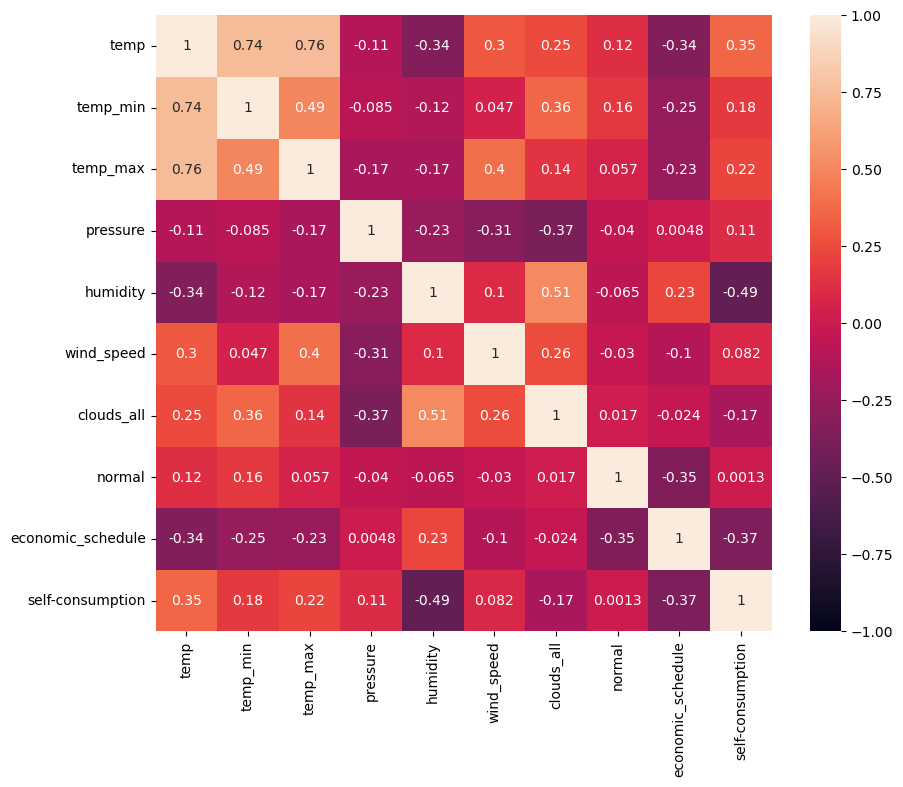

In [60]:
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)